In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [46]:
path = "data/europe_timeseries.csv"

def extract_data(countries, df_path = path):
    df = pd.read_csv(df_path)
    df = df[["dateRep", "day", "month", "year", "cases", "countriesAndTerritories"]]
    df = df[df.countriesAndTerritories.isin(countries)]
    df = df.sort_values(["year", "month","day"])
    df["cumCases"] = df.groupby(["countriesAndTerritories"])["cases"].cumsum(axis=0)
    return df.reset_index()
    # df.to_csv(df_path[:-4] + "_" + country.lower() + ".csv", index=False)
#extract_data("data/europe_timeseries.csv", "Germany")

def time_interval(df, start, end):
    """
    :param str start: yyyy-mm-dd
    :param str end: yyyy-mm-dd 
    """
    #df = pd.read_csv("data/europe_timeseries_germany.csv")
    df.dateRep = pd.to_datetime(df.dateRep, format='%d/%m/%Y')
    if (start == "start") & (end == "end"):
        return df
    elif (start == "start"):
        return df[df.dateRep < end]
    elif (end == "end"):
        return df[df.dateRep > start]
    else:
        return df[(start < df.dateRep) & (df.dateRep < end)]

def plot_countries(df):
    groups = df.groupby("countriesAndTerritories")

    fig, ax = plt.subplots(figsize = (16,8))
    ax.margins(0.05)
    for name, group in groups:
        ax.plot(group.dateRep, group.cumCases, label=name)
    ax.legend()

    plt.show()

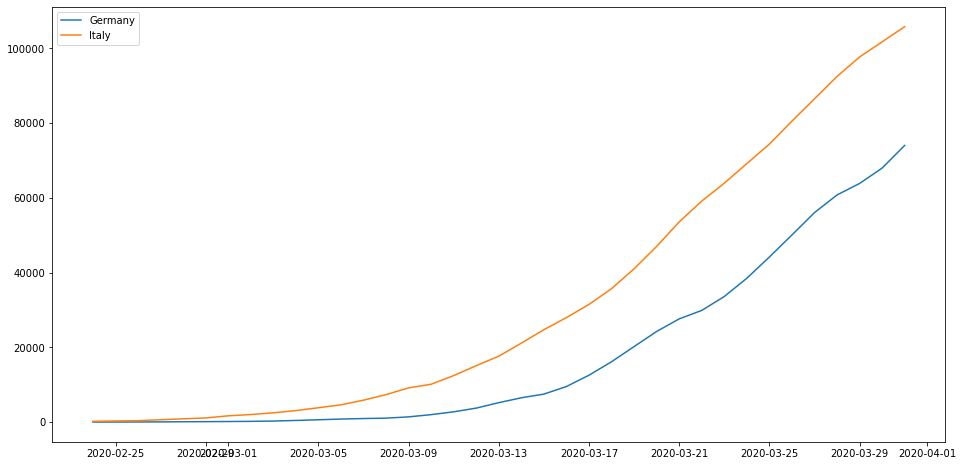

In [56]:

df_interval = time_interval(extract_data(["Germany", "Italy"]), "2020-02-22", "2020-04")
plot_countries(df_interval)